In [1]:
import os  
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Model,Input
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [2]:
print ('tensorflow_version: ',tf.__version__)
print ('keras_version: ',keras.__version__)

tensorflow_version:  1.4.1
keras_version:  2.0.8


In [3]:
df = pd.read_csv('/datc/opschaler/combined_gas_smart_weather_dfs/processed/all_dwellings_combined_hour.csv', delimiter='\t', parse_dates=['datetime'], engine = 'python')
df = df.set_index(['datetime']) 

In [4]:
df.head()

,eMeter,eMeterReturn,eMeterLow,eMeterLowReturn,ePower,ePowerReturn,gasMeter,DD,DR,FF,...,RG,SQ,T,T10,TD,U,VV,WW,dwelling,gasPower
datetime,,,,,,,,,,,,,,,,,,,,,
2017-03-07 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,307.44101,305.450012,0.0,5.341667,...,0.0,7.631617,8.733334,9.133333,4.883333,76.500000,31916.666016,1.333333,P01S01W7548,NaN
2017-03-07 16:00:00,625.401001,0.0,359.501007,0.0,383.994446,0.0,307.44101,288.200012,0.0,5.418334,...,0.0,10.000000,9.116667,10.750000,5.416667,77.166664,23800.000000,2.666667,P01S01W7548,0.0
2017-03-07 17:00:00,625.679993,0.0,359.501007,0.0,277.722229,0.0,307.44101,285.866669,0.0,4.593333,...,0.0,2.936100,7.866667,8.450000,4.550000,78.833336,22233.333984,1.000000,P01S01W7548,0.0
2017-03-07 18:00:00,625.820984,0.0,359.501007,0.0,143.624283,0.0,307.44101,286.633331,0.0,3.783333,...,0.0,5.000000,7.066667,6.816667,4.433333,82.833336,20266.666016,2.500000,P01S01W7548,0.0
2017-03-07 19:00:00,625.963013,0.0,359.501007,0.0,143.376038,0.0,307.44101,278.783325,0.0,2.741667,...,0.0,0.000000,6.616667,6.016667,4.300000,84.666664,17433.333984,2.833333,P01S01W7548,0.0


In [5]:
df.describe()

,eMeter,eMeterReturn,eMeterLow,eMeterLowReturn,ePower,ePowerReturn,gasMeter,DD,DR,FF,...,Q,RG,SQ,T,T10,TD,U,VV,WW,gasPower
count,106765.000000,106765.000000,106765.000000,106765.000000,106765.000000,106765.000000,106685.000000,115843.000000,115876.000000,115843.000000,...,115876.000000,115876.000000,115876.000000,115876.000000,115876.000000,115876.000000,115876.000000,115876.000000,115876.000000,105775.000000
mean,2189.215206,709.855795,2485.990042,332.242885,305.550675,88.666733,1885.520542,200.302983,36.040728,3.980970,...,166.180922,0.086559,2.640835,12.564907,11.972583,8.468348,77.359192,25549.410573,10.559720,0.082565
std,1361.673502,1527.941524,1556.899637,712.183033,308.312428,370.928368,948.668185,86.826243,115.735551,2.205288,...,224.347809,0.491488,3.776544,5.301646,6.307214,4.383018,14.661316,12844.080765,16.605292,0.182583
min,23.603001,0.000000,32.388000,0.000000,0.000000,0.000000,195.725006,1.850000,0.000000,0.026667,...,0.000000,0.000000,0.000000,-1.700000,-5.916667,-3.133333,30.333334,142.333328,0.000000,0.000000
25%,1152.979980,0.000000,1259.534058,0.000000,125.192200,0.000000,1132.535034,138.683334,0.000000,2.296667,...,0.166667,0.000000,0.000000,8.866667,7.966667,4.816667,67.333336,14941.666992,1.833333,0.000000
50%,1738.719971,0.000000,2004.744995,0.000000,207.511169,0.000000,1731.723022,219.750000,0.000000,3.723333,...,34.666668,0.000000,0.000000,12.100000,11.700000,8.633333,79.333336,26000.000000,2.333333,0.008057
75%,2801.851074,783.710999,3734.760010,306.691986,378.480621,0.000000,2645.158936,262.633331,0.000000,5.313334,...,298.333344,0.000000,5.386733,16.366667,16.066666,12.120000,89.333336,35816.667969,10.000000,0.066040
max,5932.604004,7923.578125,7707.495117,3508.043945,4240.345703,5999.823242,4668.230957,356.816650,600.000000,15.426666,...,926.500000,18.166666,10.000000,30.683332,32.466667,20.383333,100.000000,49900.000000,81.800003,2.692017


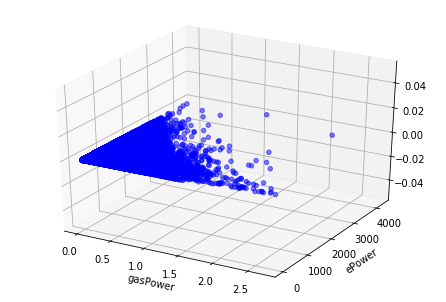

In [22]:
fig = plt.figure()
ax=Axes3D(fig)
#ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['gasPower'], df['ePower'], c='blue',marker='o',alpha=0.5)
ax.set_xlabel('gasPower')
ax.set_ylabel('ePower')
plt.show()